In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

df = pd.read_csv('../input/creditcardfraud/creditcard.csv')
df.head()

/kaggle/input/creditcardfraud/creditcard.csv


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
amount = df['Amount'].values

df['Amount'] = sc.fit_transform(amount.reshape(-1,1))

In [5]:
vals = df.iloc[:,0:31].values
vals.shape

(284807, 31)

In [6]:
X = vals[:,0:30]
y = vals[:,30]

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=3)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(227845, 30) (227845,) (56962, 30) (56962,)


In [8]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=5 , criterion='entropy')
kfold = KFold(n_splits=10,random_state=3,shuffle=True)
res = cross_val_score(tree,X_train,y_train, cv=kfold ,scoring='r2')
res

array([0.70221914, 0.71375808, 0.87861207, 0.60548923, 0.59490908,
       0.67514813, 0.4752231 , 0.73489851, 0.71681957, 0.80452629])

In [9]:
from sklearn.metrics import accuracy_score
MD = 10
mean_acc = np.zeros((MD-1))
for n in range(1,MD):
    Tree = DecisionTreeClassifier(criterion="entropy", max_depth = n).fit(X_train,y_train)
    y_predict=Tree.predict(X_test)
    mean_acc[n-1] = accuracy_score(y_test, y_predict)
mean_acc   #5 was good

array([0.99896422, 0.99910467, 0.99935044, 0.99929778, 0.99947333,
       0.99942067, 0.99942067, 0.99933289, 0.999368  ])

In [10]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [11]:
y_predict = tree.predict(X_test)

the accuracy:

Test set Accuracy:  0.9994733330992591
[[   77    23]
 [    7 56855]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     56862
         1.0       0.92      0.77      0.84       100

    accuracy                           1.00     56962
   macro avg       0.96      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962



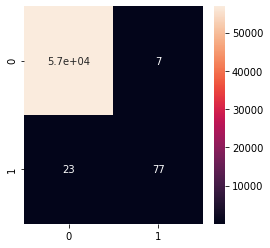

f1 is:  0.918346381143875
ROC-AUC Score is:  0.8849384474693116


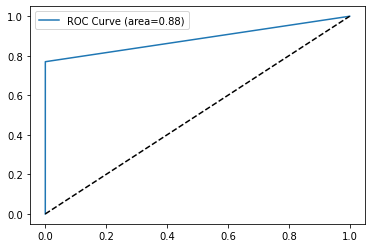

In [12]:
from sklearn import metrics
print("Test set Accuracy: ", metrics.accuracy_score(y_test, y_predict))

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
print(confusion_matrix(y_test, y_predict, labels=[1,0]))
print (classification_report(y_test, y_predict))
cm = confusion_matrix(y_test, y_predict)
fig, ax = plt.subplots(figsize=(4,4))
sns.heatmap(cm, annot=True)
plt.show()

from sklearn.metrics import f1_score
print('f1 is: ',f1_score(y_test, y_predict, average='macro'))

from sklearn.metrics import roc_auc_score, roc_curve
score = roc_auc_score(y_test, y_predict)
print('ROC-AUC Score is: ', score)
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
plt.plot(fpr, tpr, label='ROC Curve (area=%0.2f)' % score)
plt.plot([0,1], [0,1], 'k--')
plt.legend()
plt.show()

In [13]:
np.where(y_predict == 1)

(array([ 1716,  3952,  4288,  5628,  7205,  7592,  8062,  9259,  9468,
         9993, 11344, 11629, 12142, 14571, 14650, 15679, 16659, 16783,
        17172, 17244, 17842, 18331, 21145, 22319, 22848, 23829, 23950,
        24310, 25073, 25274, 25891, 25915, 27150, 27777, 28717, 28963,
        29793, 29988, 30495, 30774, 31198, 32165, 32939, 33194, 34054,
        35136, 35581, 35902, 36415, 37605, 38521, 40187, 40482, 40753,
        41353, 41488, 41712, 42203, 42363, 44360, 46258, 46981, 47208,
        47383, 47459, 48036, 48954, 49120, 49698, 49876, 50124, 50236,
        50905, 51577, 51710, 53517, 54260, 54361, 54930, 55007, 55980,
        56685, 56723, 56726]),)

these are fraud transactions

In [23]:
print('we found %d fraud'%len(np.where(y_predict == 1)[0]))

we found 84 fraud
